
# **Capstone Project - The Battle of Neighborhoods**
## **Resturants in Erbil City**





In [ ]:
import numpy as np 
import pandas as pd 
df = pd.read_html('https://en.wikipedia.org/wiki/Erbil_Governorate')[1]

In [ ]:
df.loc[2, 'District']='Makhmur'
df.loc[7, 'District']='Mergasor'
df.loc[6, 'District']='Khabat'
df.head(10)

,District,Population (2009)[9],Number of households
0,Erbil,792981,152899
1,Dashty Hawler,186346,34264
2,Makhmur,173801,30678
3,Soran,154945,27707
4,Shaqlawa,124628,23420
5,Koya,95246,18727
6,Khabat,93442,16015
7,Mergasor,44661,9711
8,Choman,23730,4749
9,Rawanduz,21280,4235


In [ ]:
df.shape

(11, 3)

In [ ]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
geolocator = Nominatim(user_agent="Erbil_food")

df['Major_Dist_Coord']= df['District'].apply(geolocator.geocode,timeout=10000).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df.drop(10,axis=0,inplace=True)


In [ ]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [ ]:
df.drop('Population (2009)[9]',axis=1,inplace=True)
df.drop('Number of households',axis=1,inplace=True)

In [ ]:
df

,District,Latitude,Longitude
0,Erbil,36.191162,44.009465
1,Dashty Hawler,36.207872,44.133571
2,Makhmur,35.776121,43.580317
3,Soran,39.496457,43.517432
4,Shaqlawa,36.411803,44.309316
5,Koya,26.373185,91.565149
6,Khabat,36.276362,43.668284
7,Mergasor,36.979367,44.214966
8,Choman,35.971203,45.578947
9,Rawanduz,36.614596,44.526519


In [ ]:
df.loc[3,'Latitude']=36.6547
df.loc[5,'Latitude']=36.079072
df.loc[3,'Longitude']=44.5378
df.loc[5,'Longitude']=44.63404
df

,District,Latitude,Longitude
0,Erbil,36.191162,44.009465
1,Dashty Hawler,36.207872,44.133571
2,Makhmur,35.776121,43.580317
3,Soran,36.654700,44.537800
4,Shaqlawa,36.411803,44.309316
5,Koya,36.079072,44.634040
6,Khabat,36.276362,43.668284
7,Mergasor,36.979367,44.214966
8,Choman,35.971203,45.578947
9,Rawanduz,36.614596,44.526519


In [ ]:
address = 'Erbil'

geolocator = Nominatim(user_agent="Erbil_food")
location = geolocator.geocode(address,timeout=10000)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Erbil are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Erbil are 36.1911624, 44.0094652.


In [ ]:
# create map of Cologne using latitude and longitude 
map_erbil = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to the map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_erbil) 
    
map_erbil

In [ ]:
CLIENT_ID = '1OVG0UCTSOPHBF3W44LEZ1WIM3CXE2DRME14XMVIOY0P3NJN' # your Foursquare ID
CLIENT_SECRET = 'KVHXMHIV43O1EG0MTI5NGKOM0512CFVWYG3WPV025NRTUMKO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1OVG0UCTSOPHBF3W44LEZ1WIM3CXE2DRME14XMVIOY0P3NJN
CLIENT_SECRET:KVHXMHIV43O1EG0MTI5NGKOM0512CFVWYG3WPV025NRTUMKO


In [ ]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Erbil are 36.1911624, 44.0094652.


In [ ]:
LIMIT = 15

radius = 600

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=1OVG0UCTSOPHBF3W44LEZ1WIM3CXE2DRME14XMVIOY0P3NJN&client_secret=KVHXMHIV43O1EG0MTI5NGKOM0512CFVWYG3WPV025NRTUMKO&v=20180605&ll=36.1911624,44.0094652&radius=600&limit=15'

In [ ]:
results = requests.get(url).json()


In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Kabab Yasin (كباب ياسين),Kebab Restaurant,36.189121,44.008957
1,Erbil Citadel,Castle,36.191170,44.009138
2,Chaykhanay Mchko Hawler,Tea Room,36.189296,44.009866
3,bazar,Farm,36.187755,44.008391
4,Central Erbil Bazaar- Citadel,Flea Market,36.188448,44.009398
5,Sultan Mudthefareya's Bazar,Electronics Store,36.189723,44.003628
6,Swiss Watch Fashoin,Shopping Mall,36.188406,44.007970
7,pacha al qasab,Middle Eastern Restaurant,36.188581,44.007629
8,Medical street,Street Art,36.195001,44.005050
9,Erbil Kale,Castle,36.187974,44.010707


In [ ]:
df.loc[0, 'District']

'Erbil'

In [ ]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
print ('{} unique categories in Erbil.'.format(nearby_venues['categories'].value_counts().shape[0]))

15 venues were returned by Foursquare.
13 unique categories in Erbil.


In [ ]:
print (nearby_venues['categories'].value_counts()[0:15])

Castle                       3
Shopping Mall                1
Street Art                   1
Flea Market                  1
Middle Eastern Restaurant    1
Tea Room                     1
Kebab Restaurant             1
Coffee Shop                  1
Café                         1
Shoe Store                   1
Toll Plaza                   1
Farm                         1
Electronics Store            1
Name: categories, dtype: int64


In [ ]:
# Exploration of the neighbourhoods in Erbil.
def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [ ]:
erbil_venues = getNearbyVenues(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Erbil
Dashty Hawler
Makhmur
Soran
Shaqlawa
Koya
Khabat
Mergasor
Choman
Rawanduz


In [ ]:
erbil_venues.shape

(131, 7)

In [ ]:
# Create a Data-Frame out of it to concentrate only on Restaurants 
Venues_only_restaurant = erbil_venues[erbil_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Venues_only_restaurant.index = np.arange(1, len(Venues_only_restaurant )+1)

In [ ]:
print (Venues_only_restaurant['Venue Category'].value_counts())


Restaurant                   11
Middle Eastern Restaurant     6
Turkish Restaurant            1
Mediterranean Restaurant      1
Asian Restaurant              1
Kebab Restaurant              1
Seafood Restaurant            1
Arepa Restaurant              1
Doner Restaurant              1
Persian Restaurant            1
Afghan Restaurant             1
Japanese Restaurant           1
Fast Food Restaurant          1
Italian Restaurant            1
Name: Venue Category, dtype: int64


In [ ]:
print('There are {} unique categories.'.format(len(Venues_only_restaurant['Venue Category'].unique())))

There are 14 unique categories.


In [ ]:
# create a dataframe of top 10 categories
Venues_Top10 = Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Venues_Top10=Venues_Top10.reset_index()
Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Venues_Top10

,Venue_Category,Frequency
0,Restaurant,11
1,Middle Eastern Restaurant,6
2,Turkish Restaurant,1
3,Mediterranean Restaurant,1
4,Asian Restaurant,1
5,Kebab Restaurant,1
6,Seafood Restaurant,1
7,Arepa Restaurant,1
8,Doner Restaurant,1
9,Persian Restaurant,1


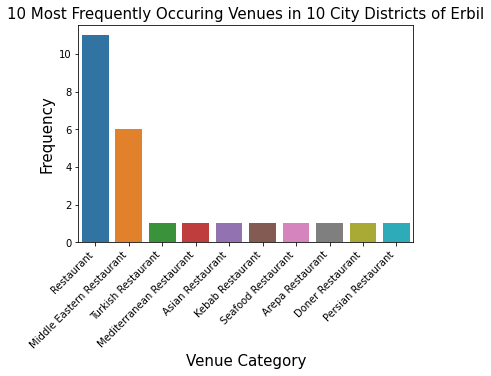

<Figure size 1296x504 with 0 Axes>

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 10 City Districts of Erbil', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [ ]:
print ("Shape of the Data-Frame with Venue Erbil only Restaurant: ", Venues_only_restaurant.shape)
Venues_only_restaurant.head(115)

Shape of the Data-Frame with Venue Erbil only Restaurant:  (29, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Erbil,36.191162,44.009465,Kabab Yasin (كباب ياسين),36.189121,44.008957,Kebab Restaurant
2,Erbil,36.191162,44.009465,Kababkhanay Najjari Nwe,36.179040,44.016775,Restaurant
3,Erbil,36.191162,44.009465,Zahle Restaurant,36.187194,43.993320,Middle Eastern Restaurant
4,Erbil,36.191162,44.009465,Chayaxanay Bayiz,36.192922,43.999056,Asian Restaurant
5,Erbil,36.191162,44.009465,Samad Restaurant,36.203691,44.008790,Middle Eastern Restaurant
6,Erbil,36.191162,44.009465,SHKAR FİSH RESTAURANT,36.186574,43.993989,Seafood Restaurant
7,Erbil,36.191162,44.009465,Dawa 2 Restaurant,36.185117,43.984177,Middle Eastern Restaurant
8,Erbil,36.191162,44.009465,Paradise,36.183454,44.026223,Restaurant
9,Erbil,36.191162,44.009465,ONYX Restaurant,36.196355,43.977455,Restaurant
10,Erbil,36.191162,44.009465,Amed Gözleme/Naska nane Amed,36.204444,43.989876,Turkish Restaurant


In [ ]:
Venues_restaurant = Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())


In [ ]:
Venues_restaurant

Neighborhood
Dashty Hawler     1
Erbil            23
Shaqlawa          3
Soran             2
Name: Venue Category, dtype: int64

In [ ]:
Venues_restaurant_df  = Venues_restaurant.to_frame().reset_index()
Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Venues_restaurant_df.index = np.arange(1, len(Venues_restaurant_df)+1)
list_rest_no =Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Venues_restaurant_df['Neighborhood'].to_list()

In [ ]:
# one hot encoding
onehot = pd.get_dummies(Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,Neighborhood,Afghan Restaurant,Arepa Restaurant,Asian Restaurant,Doner Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Persian Restaurant,Restaurant,Seafood Restaurant,Turkish Restaurant
1,Erbil,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Erbil,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Erbil,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Erbil,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,Erbil,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# New dataframe size.
onehot.shape

(29, 15)

In [ ]:
#H: Grouping by neighbourhoods and showing the mean of the frequency of occurrence for each category of restaurants.
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

,Neighborhood,Afghan Restaurant,Arepa Restaurant,Asian Restaurant,Doner Restaurant,Fast Food Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Persian Restaurant,Restaurant,Seafood Restaurant,Turkish Restaurant
0,Dashty Hawler,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1.00000,0.000000,0.000000
1,Erbil,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.043478,0.26087,0.0,0.26087,0.043478,0.043478
2,Shaqlawa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,1.00000,0.000000,0.000000
3,Soran,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.5,0.50000,0.000000,0.000000


In [ ]:
grouped.shape

(4, 15)

In [ ]:
#I: Print the neighbourhoods with their respective top 10 most common venues.
num_top_venues = 10

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Dashty Hawler----
                      venue  freq
0                Restaurant   1.0
1         Afghan Restaurant   0.0
2          Arepa Restaurant   0.0
3          Asian Restaurant   0.0
4          Doner Restaurant   0.0
5      Fast Food Restaurant   0.0
6        Italian Restaurant   0.0
7       Japanese Restaurant   0.0
8          Kebab Restaurant   0.0
9  Mediterranean Restaurant   0.0


----Erbil----
                       venue  freq
0  Middle Eastern Restaurant  0.26
1                 Restaurant  0.26
2          Afghan Restaurant  0.04
3           Arepa Restaurant  0.04
4           Asian Restaurant  0.04
5           Doner Restaurant  0.04
6       Fast Food Restaurant  0.04
7         Italian Restaurant  0.04
8        Japanese Restaurant  0.04
9           Kebab Restaurant  0.04


----Shaqlawa----
                      venue  freq
0                Restaurant   1.0
1         Afghan Restaurant   0.0
2          Arepa Restaurant   0.0
3          Asian Restaurant   0.0
4          Don

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dashty Hawler,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
1,Erbil,Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Seafood Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant
2,Shaqlawa,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
3,Soran,Restaurant,Persian Restaurant,Turkish Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant


In [ ]:
# Clustering the neighbourhoods with k-means.
kclusters = 3

grouped_clustering = grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 2], dtype=int32)

In [ ]:
merged = df
merged.head(10)

,District,Latitude,Longitude
0,Erbil,36.191162,44.009465
1,Dashty Hawler,36.207872,44.133571
2,Makhmur,35.776121,43.580317
3,Soran,36.654700,44.537800
4,Shaqlawa,36.411803,44.309316
5,Koya,36.079072,44.634040
6,Khabat,36.276362,43.668284
7,Mergasor,36.979367,44.214966
8,Choman,35.971203,45.578947
9,Rawanduz,36.614596,44.526519


In [ ]:
neighborhoods_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dashty Hawler,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
1,Erbil,Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Seafood Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant
2,Shaqlawa,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
3,Soran,Restaurant,Persian Restaurant,Turkish Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant


In [ ]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted
neighborhoods_venues_sorted_w_clusters.head(9)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dashty Hawler,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
1,Erbil,Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Seafood Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant
2,Shaqlawa,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
3,Soran,Restaurant,Persian Restaurant,Turkish Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant


In [ ]:
# add clustering labels
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)


In [ ]:
neighborhoods_venues_sorted_w_clusters.head(9)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Dashty Hawler,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
1,1,Erbil,Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Seafood Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant
2,0,Shaqlawa,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
3,2,Soran,Restaurant,Persian Restaurant,Turkish Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant


In [ ]:

merged.rename(columns={'District':'Neighborhood'}, inplace=True)

merged = merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
merged.head(10)

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Erbil,36.191162,44.009465,1.0,Restaurant,Middle Eastern Restaurant,Turkish Restaurant,Seafood Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant
1,Dashty Hawler,36.207872,44.133571,0.0,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
2,Makhmur,35.776121,43.580317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Soran,36.654700,44.537800,2.0,Restaurant,Persian Restaurant,Turkish Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
4,Shaqlawa,36.411803,44.309316,0.0,Restaurant,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
5,Koya,36.079072,44.634040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Khabat,36.276362,43.668284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Mergasor,36.979367,44.214966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Choman,35.971203,45.578947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Rawanduz,36.614596,44.526519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged['Cluster Labels'] = merged['Cluster Labels'].fillna(0)

merged = merged.astype({"Cluster Labels": int})

In [ ]:
#Finally, let's visualize the resulting clusters.
map_restaurants10 = folium.Map(location=[latitude,longitude], tiles='cartodbpositron')
# set color scheme for the five clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(merged['Latitude'], 
                                  merged['Longitude'], 
                                  merged['Neighborhood'], 
                                  merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

In [ ]:
#Examination of the 4 clusters.
#Cluster 1
merged.loc[merged['Cluster Labels'] == 0,merged.columns[[1] + list(range(5,merged.shape[1]))]]


,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,36.207872,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
2,35.776121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,36.411803,Turkish Restaurant,Seafood Restaurant,Persian Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
5,36.079072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,36.276362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,36.979367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,35.971203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,36.614596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Cluster 2
merged.loc[merged['Cluster Labels'] == 1, merged.columns[[1] + list(range(5, merged.shape[1]))]]


,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,36.191162,Middle Eastern Restaurant,Turkish Restaurant,Seafood Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant,Doner Restaurant


In [ ]:
#Cluster 3
merged.loc[merged['Cluster Labels'] == 2, merged.columns[[1] + list(range(5,merged.shape[1]))]]


,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,36.6547,Persian Restaurant,Turkish Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kebab Restaurant,Japanese Restaurant,Italian Restaurant,Fast Food Restaurant
